In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import math
# Loading your IBM Q account(s)
IBMQ.load_accounts()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/utils/deprecation.py:49: DeprecationWarning: IBMQ.load_accounts() is being deprecated. Please use IBM Q Experience v2 credentials and IBMQ.load_account() (note the singular form) instead. You can use IBMQ.update_account() to update your stored credentials, if applicable.
  DeprecationWarning)


IBMQAccountError: 'No IBMQ credentials found on disk.'

In [3]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qft3 = QuantumCircuit(q,c)

In [4]:
qft3.h(q[0])
qft3.cu1(math.pi/2, q[1], q[0])
qft3.cu1(math.pi/4, q[2], q[0])
qft3.h(q[1])
qft3.cu1(math.pi/2, q[2], q[1])
qft3.h(q[2])

In [5]:
qft3.draw()

In [6]:
def input_state(circ, q, n):
    """n-bit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(math.pi/float(2**j) * (-1), q[j])#.inverse()
        
def qft(circ, q, n):
    """n-bit QFT on q in circ"""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1, n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()

In [10]:
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qft3 = QuantumCircuit(q, c)

In [11]:
qft(qft3, q, 3)
# qft(qft3, q, 3)
for i in range(3):
    qft3.measure(q[i], c[i])

#print(qft3.qasm())
qft3.draw()

In [12]:
backend = Aer.get_backend("qasm_simulator")
simulate = execute(qft3, backend=backend, shots=4069).result()
simulate.get_counts()

{'000': 451,
 '010': 459,
 '100': 534,
 '110': 516,
 '011': 501,
 '101': 544,
 '001': 508,
 '111': 556}

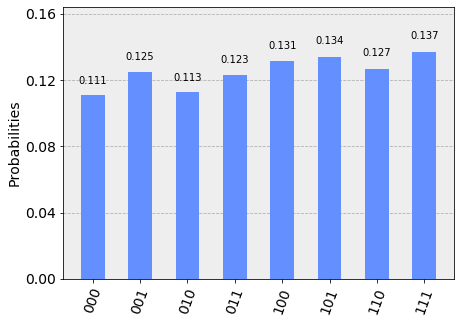

In [13]:
plot_histogram(simulate.get_counts())

In [7]:
q = QuantumRegister(8, 'x')
c = ClassicalRegister(8, 'c')

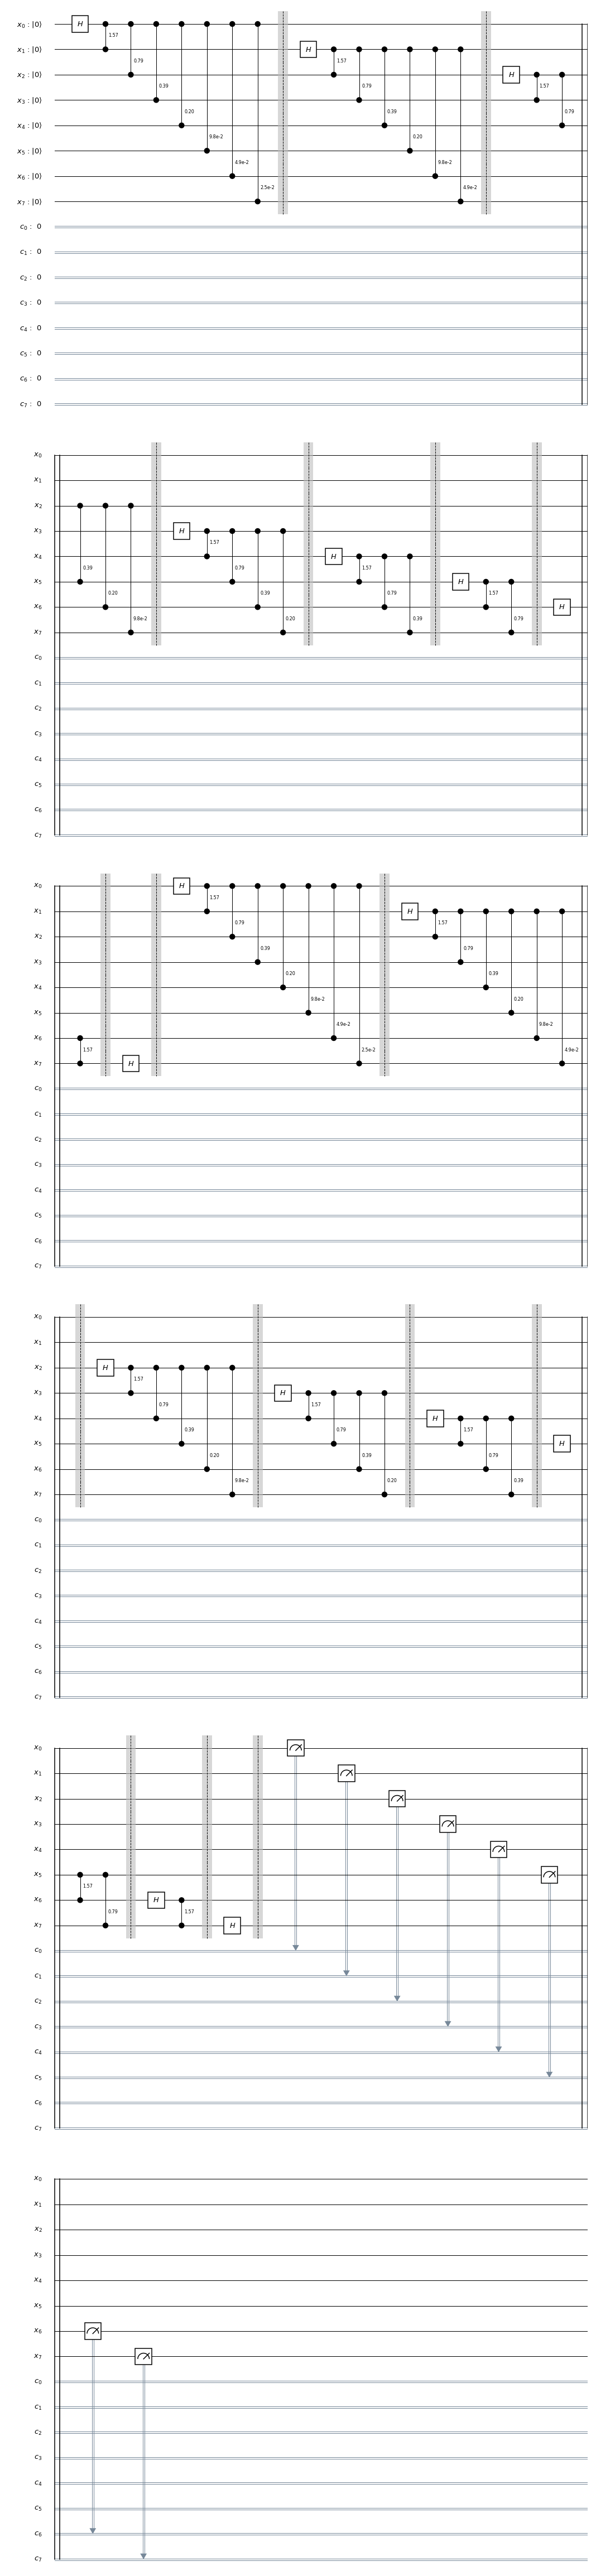

In [16]:
qft8a = QuantumCircuit(q, c)
# for i in range(4):
#     qft8a.x(q[2*i])
    
qft(qft8a, q, 8)
qft(qft8a, q, 8)

for i in range(8):
    qft8a.measure(q[i], c[i])

qft8a.draw()

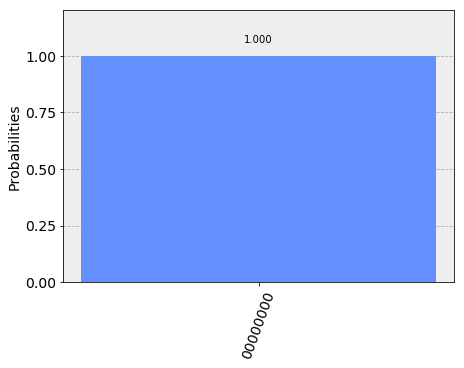

In [17]:
backend = Aer.get_backend("qasm_simulator")
simulate = execute(qft8a, backend=backend, shots=1024).result()
plot_histogram(simulate.get_counts())

In [18]:
simulate.get_counts()

{'00000000': 1024}

In [4]:
qft(qft3)
qft.measure(q,c)

TypeError: qft() missing 2 required positional arguments: 'q' and 'n'